### DEMMATH03 
# Major Distribution CDFs and PDFs

In [1]:
from compecon import demo
import numpy as np
import matplotlib.pyplot as plt

Change some settings for the plots

In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

from matplotlib import rc
rc('font', **font)
rc('text', usetex=True)
%matplotlib inline

First define a layout function to help format the plots

## CONTINUOUS DISTRIBUTIONS

In [3]:
from scipy.stats import norm, lognorm, beta, gamma, expon, chi2, f, t, logistic
n = 400

In [4]:
def plot_distribution(x, ypdf, ycdf, p=None, q=None):
    xr = [min(x), max(x)]
    plt.figure(figsize=[12,5])
    demo.subplot(1,2,1,'Probability Density', 'x', '', xr)
    plt.plot(x, ypdf)

    demo.subplot(1,2,2,'Cumulative Probability', 'x', '', xr)
    plt.plot(x, ycdf)

    if p is not None:
        plt.plot([xr[0], q, q], [p, p, 0.0], color='red', linestyle='dotted')
        demo.annotate(q, 0.0, '$x_{%.2f} = %.2f$' % (p, q), offset=(15,0),fs=16,ms=7)
        demo.annotate(xr[0], p, '%.2f' % p, offset=(-10,0),fs=16,ms=7)

### Standard Normal distribution

Prob[-1 < x <= 1] = 0.6827
Prob[-2 < x <= 2] = 0.9545

Prob[-1.645 < X <= 1.645] = 0.90
Prob[-1.960 < X <= 1.960] = 0.95
Prob[-2.576 < X <= 2.576] = 0.99


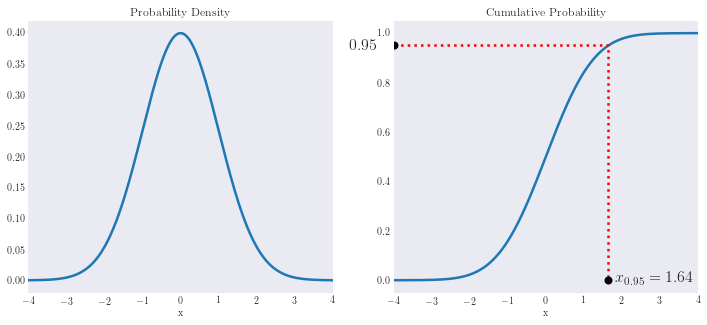

In [5]:
x =  np.linspace(-4, 4, n)
p = 0.95
plot_distribution(x, norm.pdf(x), norm.cdf(x), p, norm.ppf(p))

print(f'Prob[-1 < x <= 1] = {norm.cdf(1) - norm.cdf(-1):.4f}')
print(f'Prob[-2 < x <= 2] = {norm.cdf(2) - norm.cdf(-2):.4f}')

print(f'\nProb[{norm.ppf(0.05):.3f} < X <= {norm.ppf(0.95):.3f}] = 0.90')
print(f'Prob[{norm.ppf(0.025):.3f} < X <= {norm.ppf(0.975):.3f}] = 0.95')
print(f'Prob[{norm.ppf(0.005):.3f} < X <= {norm.ppf(0.995):.3f}] = 0.99')

### Logistic distribution

Prob[-1 < x <= 1] = 0.4621
Prob[-2 < x <= 2] = 0.7616

Prob[-2.944 < X <= 2.944] = 0.90
Prob[-3.664 < X <= 3.664] = 0.95
Prob[-5.293 < X <= 5.293] = 0.99


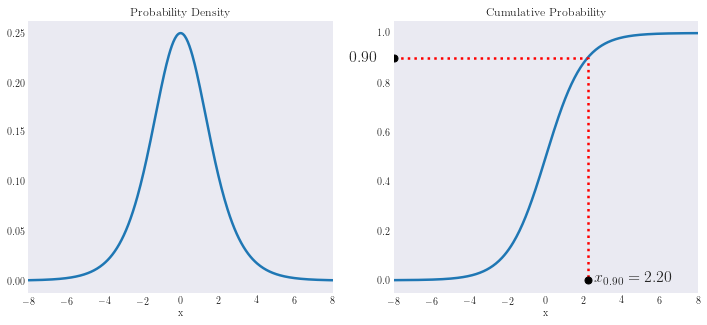

In [6]:
x =  np.linspace(-8, 8, n)
p = 0.9
plot_distribution(x, logistic.pdf(x) , logistic.cdf(x), p, logistic.ppf(p))

print(f'Prob[-1 < x <= 1] = {logistic.cdf(1) - logistic.cdf(-1):.4f}')
print(f'Prob[-2 < x <= 2] = {logistic.cdf(2) - logistic.cdf(-2):.4f}')

print(f'\nProb[{logistic.ppf(0.05):.3f} < X <= {logistic.ppf(0.95):.3f}] = 0.90')
print(f'Prob[{logistic.ppf(0.025):.3f} < X <= {logistic.ppf(0.975):.3f}] = 0.95')
print(f'Prob[{logistic.ppf(0.005):.3f} < X <= {logistic.ppf(0.995):.3f}] = 0.99')

### Lognormal distribution


Prob[0 < X <= 3.602] = 0.90
Prob[0 < X <= 5.180] = 0.95
Prob[0 < X <= 10.240] = 0.99


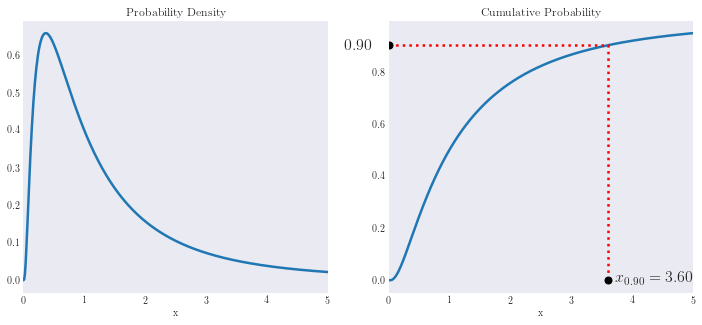

In [7]:
mu, var = 0, 1
params = {'s': np.sqrt(var), 
          'scale': np.exp(mu)}

x =  np.linspace(0, 5, n)
p = 0.9
plot_distribution(x, lognorm.pdf(x, **params), lognorm.cdf(x, **params), p, lognorm.ppf(p, **params))

print(f'\nProb[0 < X <= {lognorm.ppf(0.90, **params):.3f}] = 0.90')
print(f'Prob[0 < X <= {lognorm.ppf(0.95, **params):.3f}] = 0.95')
print(f'Prob[0 < X <= {lognorm.ppf(0.99, **params):.3f}] = 0.99')

### Exponential distribution


Prob[0 < X <= 2.303] = 0.90
Prob[0 < X <= 2.996] = 0.95
Prob[0 < X <= 4.605] = 0.99


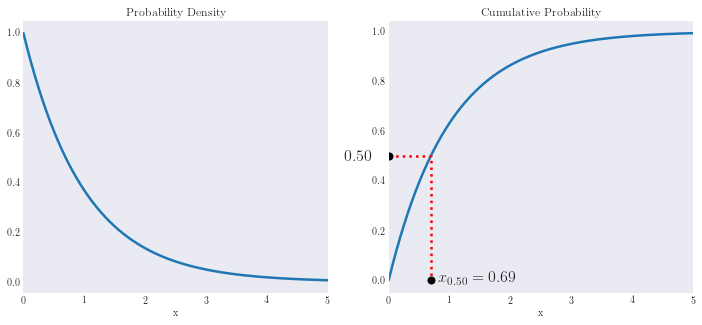

In [8]:
x =  np.linspace(0, 5, n)
p = 0.5
plot_distribution(x, expon.pdf(x), expon.cdf(x), p, expon.ppf(p))


print(f'\nProb[0 < X <= {expon.ppf(0.90):.3f}] = 0.90')
print(f'Prob[0 < X <= {expon.ppf(0.95):.3f}] = 0.95')
print(f'Prob[0 < X <= {expon.ppf(0.99):.3f}] = 0.99')

###  Gamma Distribution

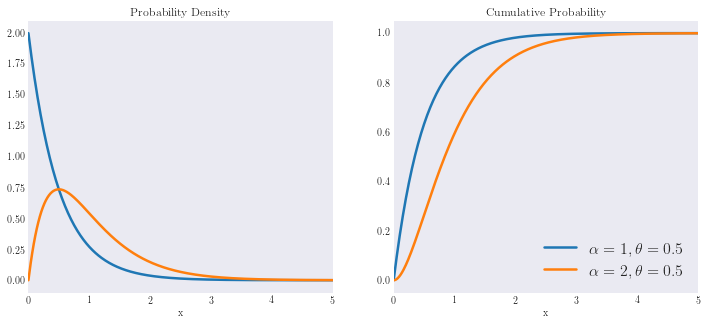

In [9]:
x =  np.linspace(0, 5, n)
plot_distribution(x, np.array([gamma.pdf(x, 1,scale=0.5), gamma.pdf(x,2, scale=0.5)]).T,
                  np.array([gamma.cdf(x, 1, scale=0.5), gamma.cdf(x,2, scale=0.5)]).T)
plt.legend([r'$\alpha=1, \theta=0.5$', 
           r'$\alpha=2, \theta=0.5$'], fontsize=16)

### Beta Distribution

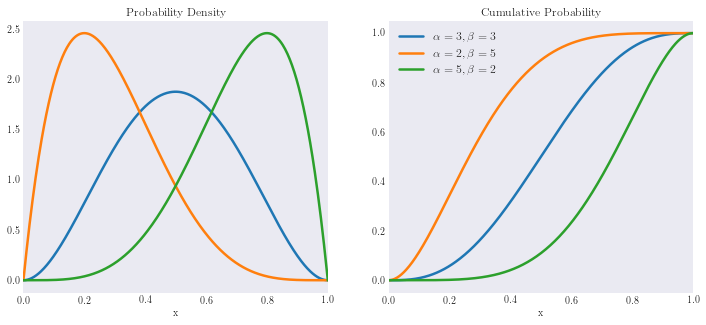

In [10]:
x =  np.linspace(0, 1, n)
plot_distribution(x, np.array([beta.pdf(x, 3,3), beta.pdf(x,2,5), beta.pdf(x,5,2)]).T,
                  np.array([beta.cdf(x, 3,3), beta.cdf(x,2,5), beta.cdf(x,5,2)]).T)
plt.legend([r'$\alpha=3, \beta=3$', r'$\alpha=2, \beta=5$', r'$\alpha=5, \beta=2$'], fontsize=12)

### Chi-squared distribution

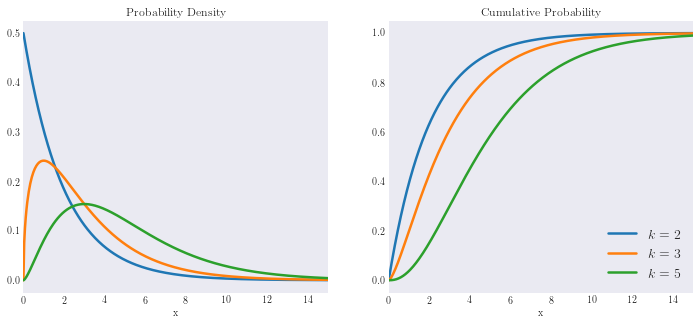

In [11]:
x =  np.linspace(0, 15, n)
plot_distribution(x, np.array([chi2.pdf(x, 2), chi2.pdf(x,3), chi2.pdf(x,5)]).T,
                  np.array([chi2.cdf(x, 2), chi2.cdf(x,3), chi2.cdf(x,5)]).T)
plt.legend([r'$k=2$', r'$k=3$', r'$k=5$'], fontsize=14)

###  F distribution

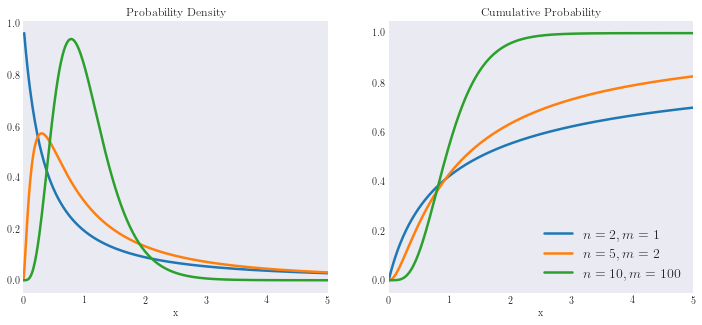

In [12]:
x =  np.linspace(0, 5, n)
plot_distribution(x, np.array([f.pdf(x, 2,1), f.pdf(x,5,2), f.pdf(x,10,100)]).T,
                  np.array([f.cdf(x, 2,1), f.cdf(x,5,2), f.cdf(x,10, 100)]).T)
plt.legend([r'$n=2, m=1$', r'$n=5, m=2$', r'$n=10, m=100$'], fontsize=14)

###  Student's- t distribution

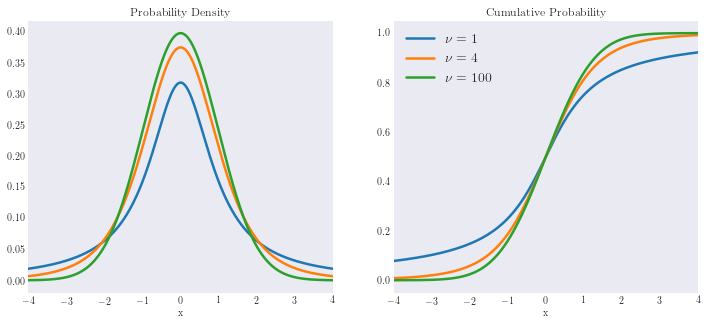

In [13]:
x =  np.linspace(-4, 4, n)
plot_distribution(x, np.array([t.pdf(x, 1), t.pdf(x,4), t.pdf(x,100)]).T,
                  np.array([t.cdf(x, 1), t.cdf(x,4), t.cdf(x, 100)]).T)
plt.legend([r'$\nu=1$', r'$\nu=4$', r'$\nu=100$'], fontsize=14)

## DISCRETE DISTRIBUTIONS

In [14]:
from scipy.stats import binom, geom, poisson

In [15]:
def plot_ddistribution(x, ypdf, x2, ycdf):
    plt.figure(figsize=[12,5])
    demo.subplot(1,2,1,'Probability Density', 'x', '')
    plt.bar(x, ypdf)
    plt.xticks(x)

    demo.subplot(1,2,2,'Cumulative Probability', 'x', '')
    plt.step(x2, ycdf)
    plt.xticks(x)

### Binomial distribution

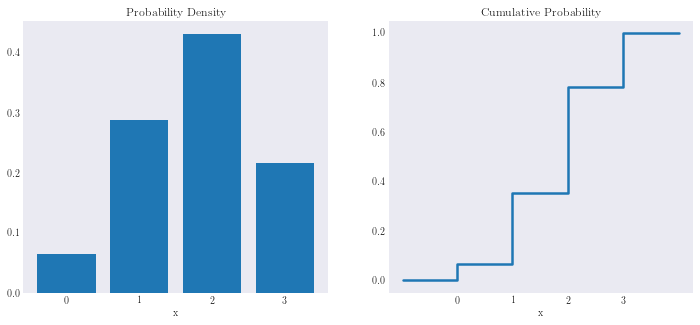

In [16]:
n, p = 3, 0.6
x =  np.arange(n+1)
x2 = np.linspace(-1, n+1, 60*(n+2)+1)
plot_ddistribution(x, binom.pmf(x, n, p), x2, binom.cdf(x2, n,p))

### Geometric distribution

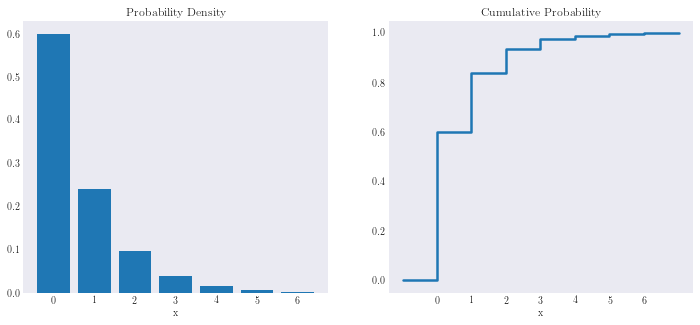

In [17]:
n, p = 6, 0.6
x =  np.arange(n+1)
x2 = np.linspace(-1, n+1, 60*(n+2)+1)
plot_ddistribution(x, geom.pmf(x, p, loc=-1), x2, geom.cdf(x2, p, loc=-1))

### Poisson distribution

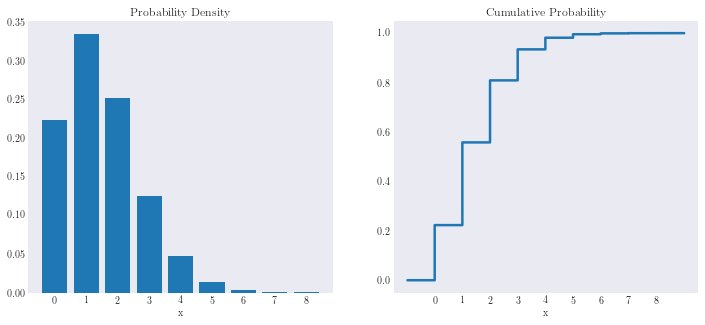

In [18]:
n, lambda_ = 8, 1.5
x =  np.arange(n+1)
x2 = np.linspace(-1, n+1, 60*(n+2)+1)
plot_ddistribution(x, poisson.pmf(x, lambda_), x2, poisson.cdf(x2, lambda_))